In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

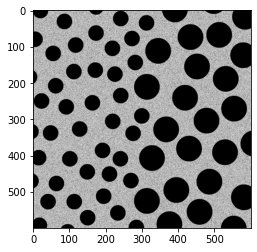

In [2]:
# Recebendo a imagem em escalas de cinza
imagem_original=cv2.imread("fig943.tif", 0)
plt.imshow(imagem_original, cmap="gray")

In [3]:
def erosao(imagem, filtro):
    """
    Função que realizará a técnica de morfologia matemática de Erosão em uma dada imagem
    com um respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a modificação
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_imagem: numpy.array
        Imagem após o processo de convolução com seu respectivo
        filtro
    
    """
    altura, largura=imagem.shape
    max_val=imagem.max()
    
    limite_borda=(filtro.shape[0]-1)//2
    filtro_sum=np.sum(filtro)*max_val
    
    output_imagem=np.zeros((altura, largura))  
    
    for x in range(limite_borda, altura-limite_borda):
        for y in range(limite_borda, largura-limite_borda):
            if np.sum(imagem[x-limite_borda: x+limite_borda+1, y-limite_borda: y+limite_borda+1]*filtro)==filtro_sum:
                output_imagem[x, y]=max_val

    return output_imagem

In [24]:
imagem_invertida=255-imagem_original

_, mask=cv2.threshold(imagem_invertida, 160, 255, cv2.THRESH_BINARY)

filtro=cv2.getStructuringElement(cv2.MORPH_OPEN,(43,43)) #a filtragem só é possível com tamanho do elemento = 43

imagem_erosao=255-erosao(imagem_invertida, filtro)

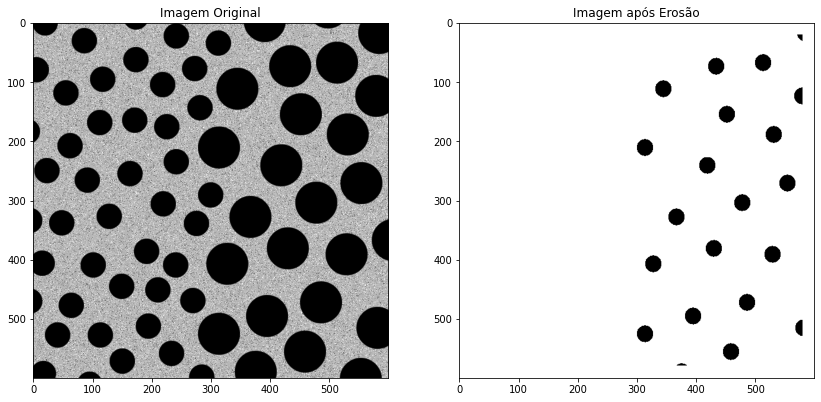

In [6]:
fig, ax = plt.subplots(1,2, figsize=(14,14))

ax[0].imshow(imagem_original, cmap="gray")
ax[1].imshow(imagem_erosao, cmap="gray")

titulos=["Imagem Original",
         "Imagem após Erosão"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc="center")

   Para a filtragem dos círculos médios da Figura 9.34, provinda do livro texto do Gonzáles, utilizou-se a técnica de Erosão, a qual desgasta os limites (bordas) do objeto em primeiro plano. Em relação ao filtro temos a mesma lógica da convolução, o qual percorre a imagem inteira e, assim, aplica as alterações com valores binários.  
   Como se trata de uma imagem que é possível fazer a alteração do seu fundo para branco, é recomendável resolver a questão com essa metodologia, entretanto ela apresenta uma limitação. Devido a utilização da técnica de Erosão, todos elementos da imagem tiveram seu formato modificado, assim os círculos maiores tiveram sua circunferência reduzida.